In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load data
df = pd.read_csv("PDD.csv")
X = np.arange(1, 11.05, 0.05)
Y = df.iloc[:, 0].to_numpy()  
Z = df.iloc[:, 1:].to_numpy()

In [3]:
print(X.shape) #energy
print(Y.shape) #depth
print(Z.shape) #values

(201,)
(48,)
(48, 201)


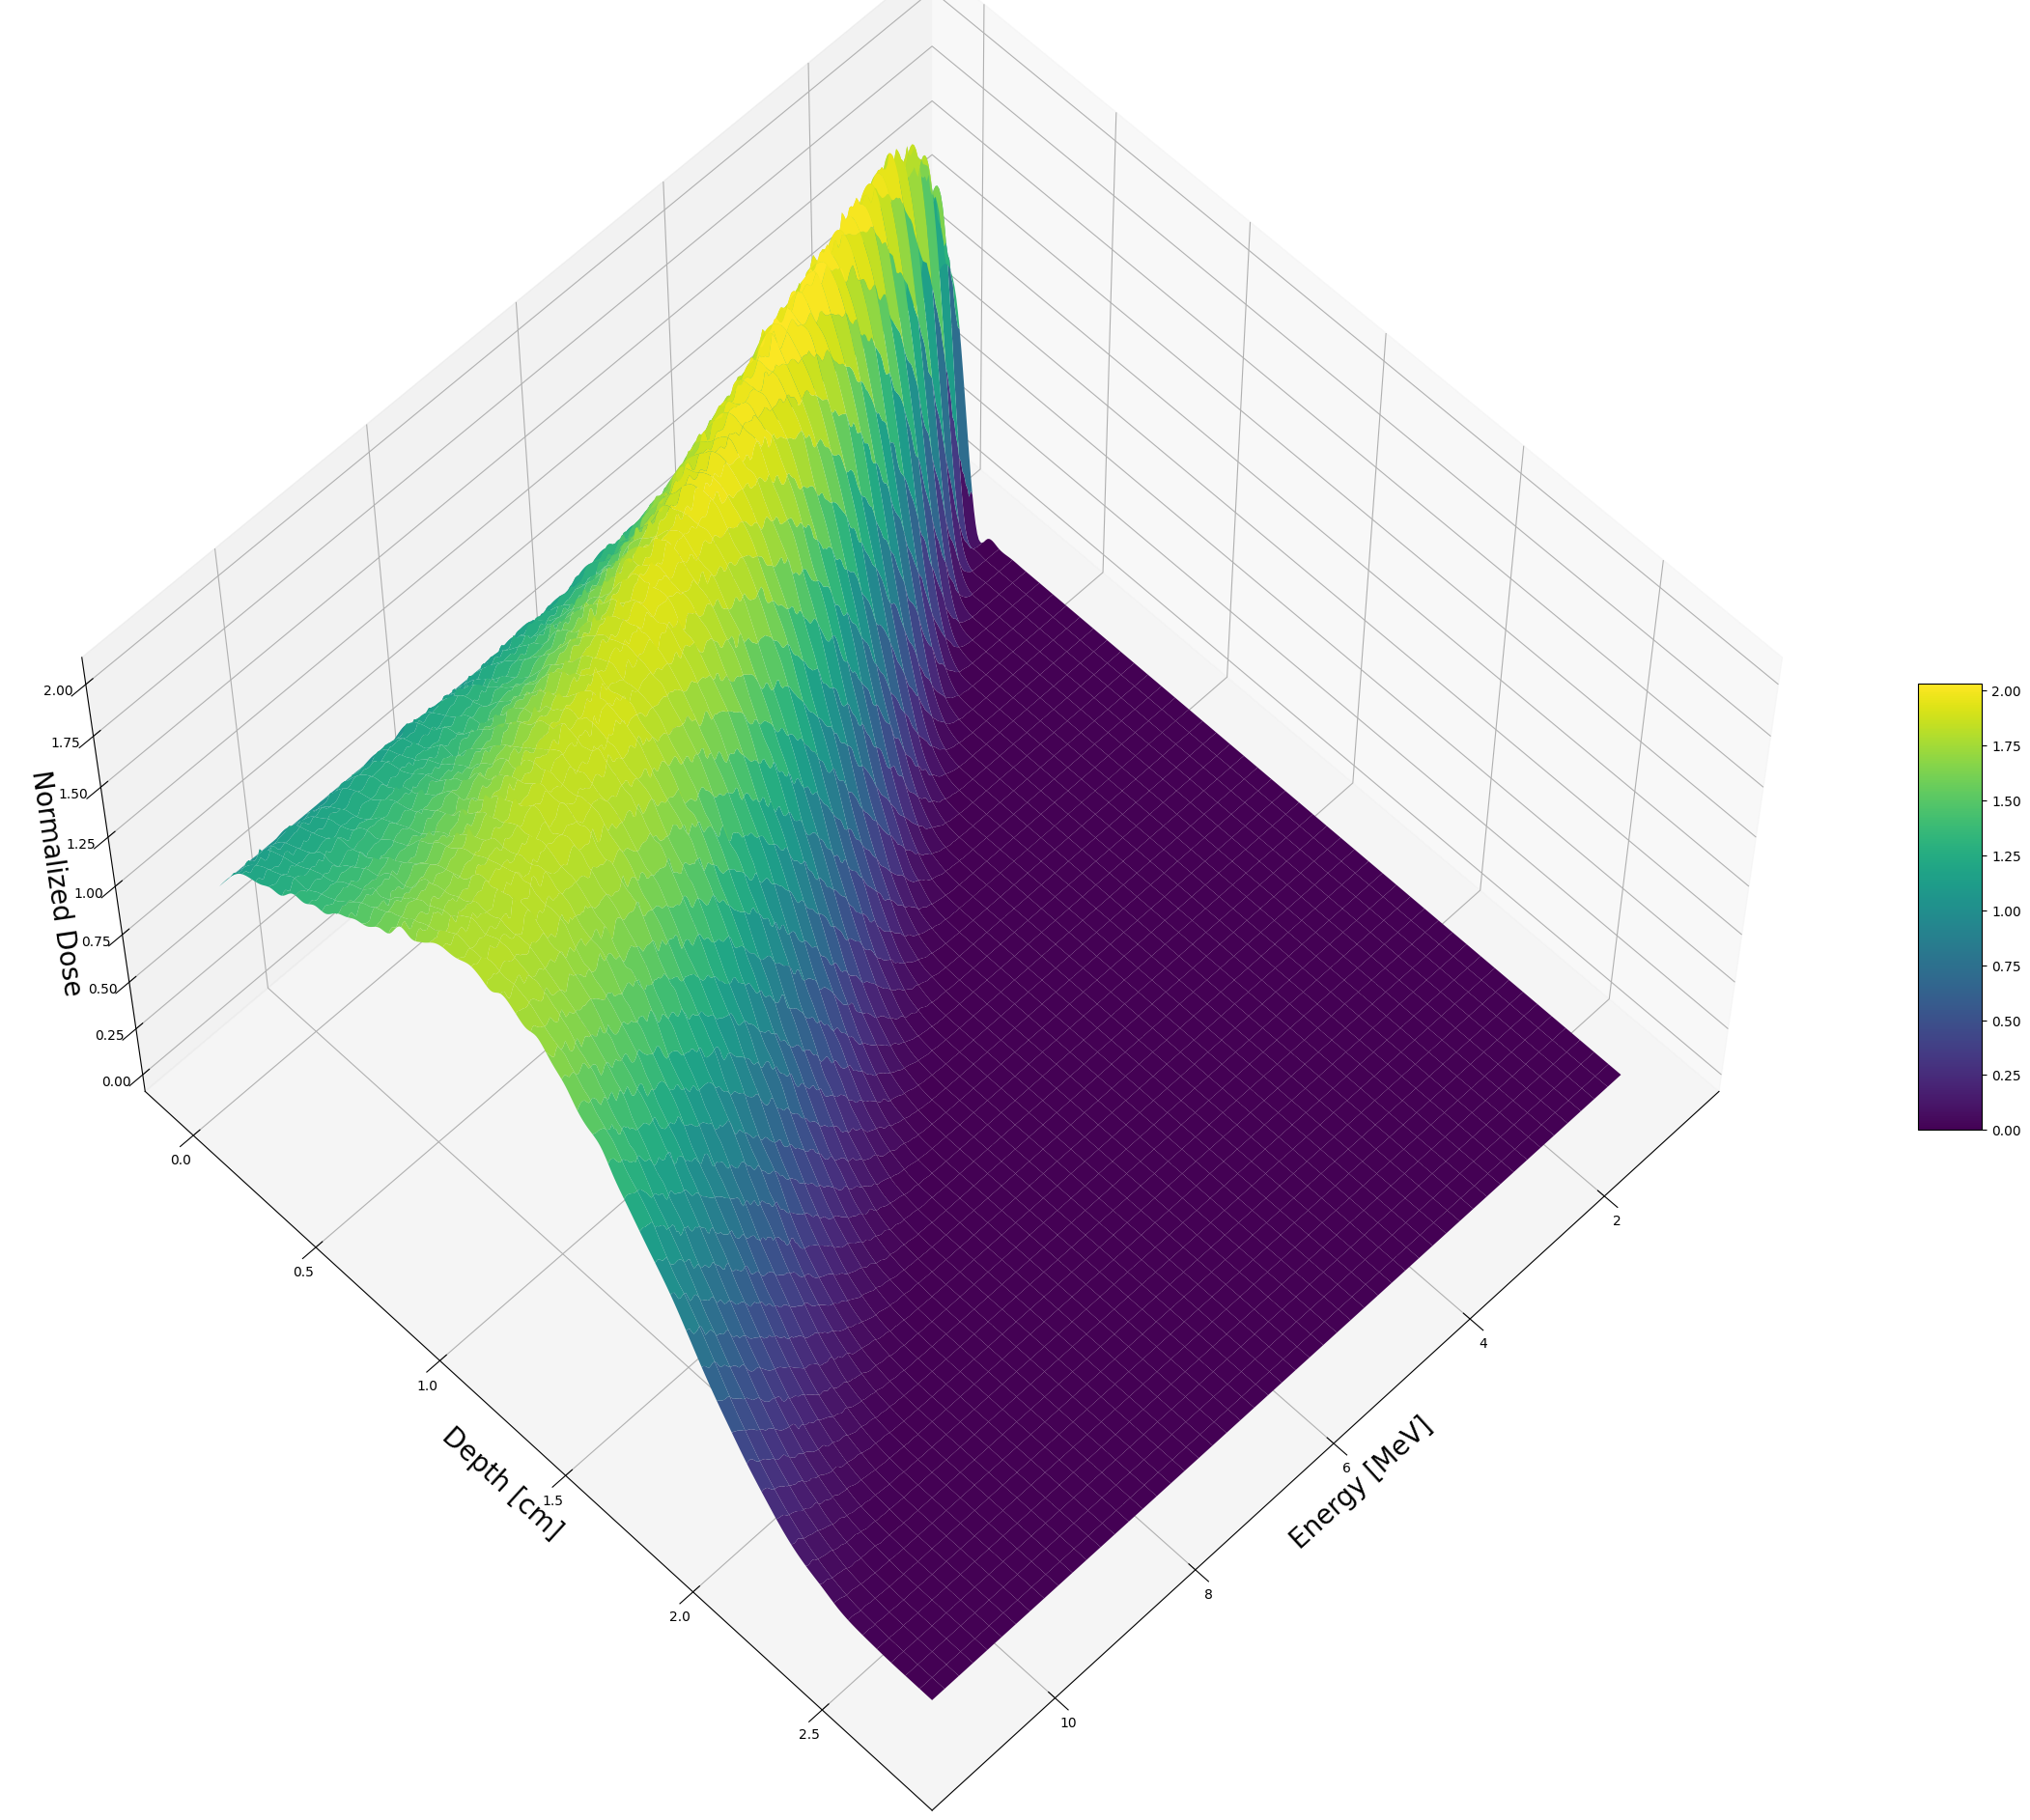

In [4]:
# Create the original meshgrid
X, Y = np.meshgrid(X, Y)

# Flatten the data for interpolation
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()

# Create a finer grid for smoother plot
xi = np.linspace(X.min(), X.max(), 400)  # Increase to 400 points along X-axis
yi = np.linspace(Y.min(), Y.max(), 400)  # Increase to 400 points along Y-axis
X_smooth, Y_smooth = np.meshgrid(xi, yi)

# Interpolate Z to the finer grid
Z_smooth = griddata((x_flat, y_flat), z_flat, (X_smooth, Y_smooth), method='cubic')

# Plot the smoother 3D surface
fig = plt.figure(figsize=(30, 60))
ax = fig.add_subplot(111, projection='3d')

# Create the smooth surface plot
surf = ax.plot_surface(X_smooth, Y_smooth, Z_smooth, cmap="viridis", edgecolor='none')

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.1, aspect=7)

# Set axis labels with increased font size
ax.set_xlabel('Energy [MeV]', fontsize=20) 
ax.set_ylabel('Depth [cm]', fontsize=20)    
ax.set_zlabel('Normalized Dose', fontsize=20)  

# Set view angle
ax.view_init(elev=60, azim=45)

plt.show()

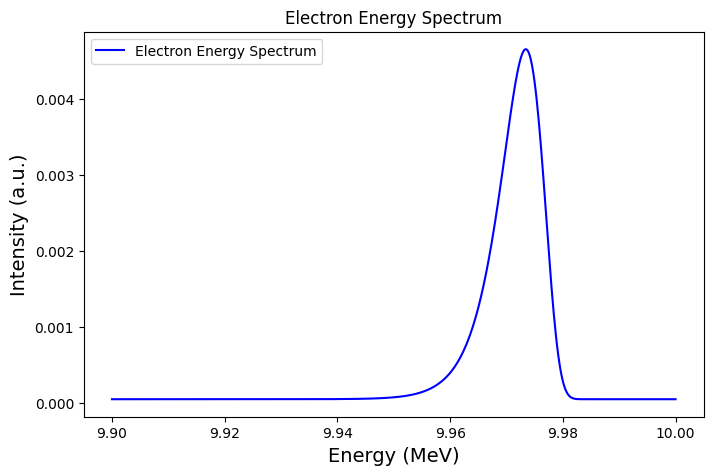

In [5]:
#electron_energy_spectrum
def electron_energy_spectrum(E, F0, Ep, W, A):
    z = 2*(E - Ep) / W
    return F0 + A * np.exp(z + 1 - np.exp(z))
F0 = 4.612883894459182e-05
Ep = 9.973424017645547
W =  0.007547612217305409
A =  0.00460311859861495
# Generate a range of E values
E_values = np.linspace(9.9, 10, 500)
spectrum_values = electron_energy_spectrum(E_values, F0, Ep, W, A)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(E_values, spectrum_values, color='blue', label='Electron Energy Spectrum')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
plt.title('Electron Energy Spectrum')
plt.grid(False)
plt.legend()
plt.show()

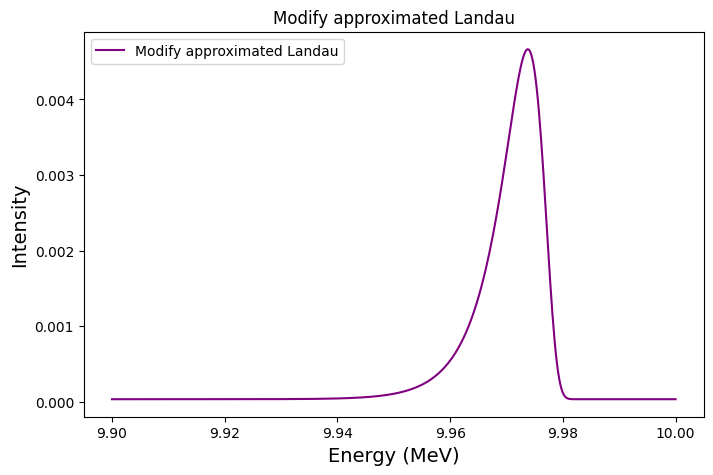

In [6]:

# Define the modify_approximated_landau with the provided parameters
def modify_approximated_landau(E, F0, A, Ep, W):
    z = 2 * (Ep - E) / W
    return F0 + A * np.exp(-0.5 * np.exp(-z) - 0.5 * z)

# Given parameter values
F0 = 3.476050438473762e-05
A = 0.007632269114959895
Ep = 9.973782233887997
W = 0.00510221548239472

# Generate a range of E values
E_values = np.linspace(9.9, 10, 500)
new_fit_values = modify_approximated_landau(E_values, F0, A, Ep, W)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(E_values, new_fit_values, color='purple', label='Modify approximated Landau')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Modify approximated Landau')
plt.grid(False)
plt.legend()
plt.show()



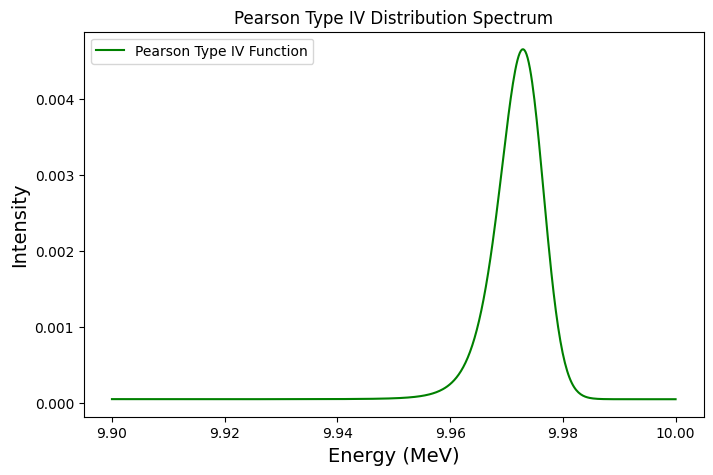

In [7]:
# Define the pearson_type_iv function with the provided parameters
def pearson_type_iv(x, y0, A, m, v, a):
    # Pearson Type IV distribution
    z = (x - m) / v
    return y0 + A * (1 + z ** 2 / a) ** (-m) * np.exp(-v * np.arctan(z) / a)

# Given parameter values
y0 = 4.718498022517191e-05
A = 0.0023556867863969906
m = 9.977044130804595
v = 0.2769499175444389
a = 0.0029629696919162025

# Generate a range of x values
x_values = np.linspace(9.9, 10, 500)
pearson_iv_values = pearson_type_iv(x_values, y0, A, m, v, a)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_values, pearson_iv_values, color='green', label='Pearson Type IV Function')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Pearson Type IV Distribution Spectrum')
plt.grid(False)
plt.legend()
plt.show()

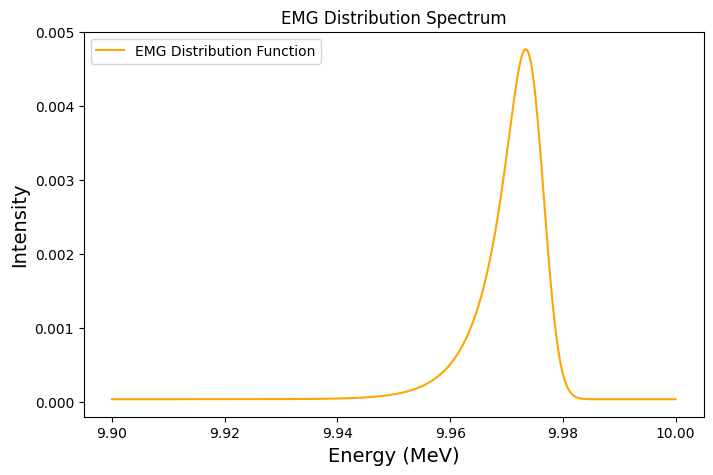

In [8]:
# Re-import the missing function after environment reset
from scipy.special import erf

# Define the emg_distribution function with the provided parameters
def emg_distribution(E, mu, sigma, lambd, y0, A):
    term1 = (lambd / 2) * np.exp(-lambd * (mu - E - (sigma ** 2 * lambd) / 2))
    term2 = 1 + erf((mu - E - (sigma ** 2 * lambd)) / (np.sqrt(2) * sigma))
    return y0 + A * term1 * term2

# Given parameter values
mu = 9.975910283681163
sigma = 0.002376525048478938
lambd = 196.44814887845516
y0 = 3.338157277718448e-05
A = 4.899827025476344e-05

# Generate a range of E values
E_values = np.linspace(9.9, 10, 500)
emg_values = emg_distribution(E_values, mu, sigma, lambd, y0, A)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(E_values, emg_values, color='orange', label='EMG Distribution Function')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('EMG Distribution Spectrum')
plt.grid(False)
plt.legend()
plt.show()


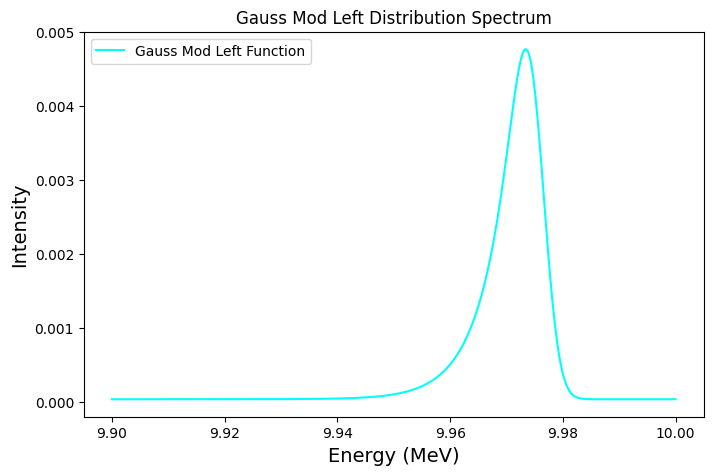

In [9]:
from scipy.special import erfc

# Define the gauss_mod_left function with the provided parameters
def gauss_mod_left(x, y0, A, xc, w, t0):
    z = ((x - xc) / w + w / t0) / np.sqrt(2)
    return y0 + 0.5 * A / t0 * (np.exp(0.5 * (w / t0) ** 2 + (x - xc) / t0) * erfc(z))

# Given parameter values
y0 = 3.3381691432545284e-05
A = 4.8998253733318164e-05
xc = 9.975910282735793
w = 0.00237652429080501
t0 = 0.005090397780168652

# Generate a range of x values
x_values = np.linspace(9.9, 10, 500)
gauss_mod_left_values = gauss_mod_left(x_values, y0, A, xc, w, t0)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_values, gauss_mod_left_values, color='cyan', label='Gauss Mod Left Function')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Gauss Mod Left Distribution Spectrum')
plt.grid(False)
plt.legend()
plt.show()


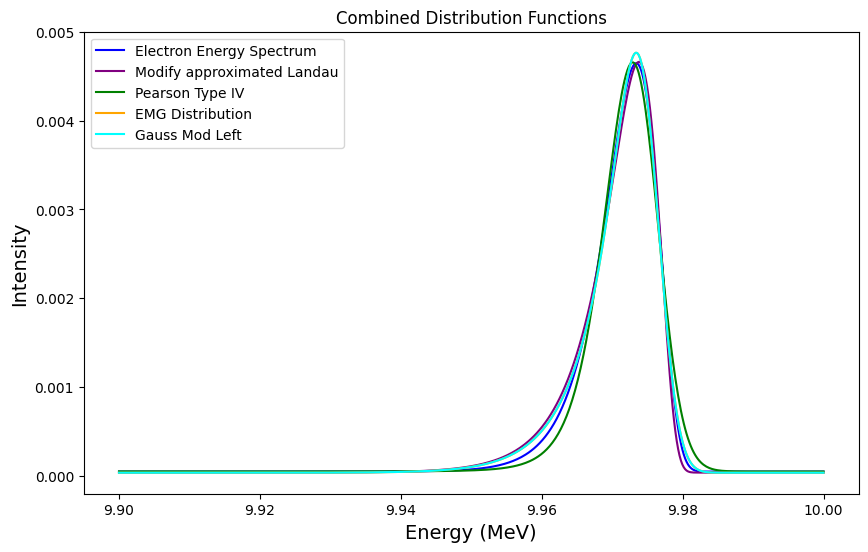

In [10]:
# Define all functions with their respective parameters for combined plotting

# Electron Energy Spectrum parameters
def electron_energy_spectrum(E, F0, Ep, W, A):
    z = 2 * (E - Ep) / W
    return F0 + A * np.exp(z + 1 - np.exp(z))
params_electron_energy = [4.612883894459182e-05, 9.973424017645547, 0.007547612217305409, 0.00460311859861495]

# New Fit Function parameters
def new_fit_function(E, F0, A, Ep, W):
    z = 2 * (Ep - E) / W
    return F0 + A * np.exp(-0.5 * np.exp(-z) - 0.5 * z)
params_new_fit = [3.476050438473762e-05, 0.007632269114959895, 9.973782233887997, 0.00510221548239472]

# Pearson Type IV parameters
def pearson_type_iv(x, y0, A, m, v, a):
    z = (x - m) / v
    return y0 + A * (1 + z ** 2 / a) ** (-m) * np.exp(-v * np.arctan(z) / a)
params_pearson_type_iv = [4.718498022517191e-05, 0.0023556867863969906, 9.977044130804595, 0.2769499175444389, 0.0029629696919162025]

# EMG Distribution parameters
def emg_distribution(E, mu, sigma, lambd, y0, A):
    term1 = (lambd / 2) * np.exp(-lambd * (mu - E - (sigma ** 2 * lambd) / 2))
    term2 = 1 + erf((mu - E - (sigma ** 2 * lambd)) / (np.sqrt(2) * sigma))
    return y0 + A * term1 * term2
params_emg_distribution = [9.975910283681163, 0.002376525048478938, 196.44814887845516, 3.338157277718448e-05, 4.899827025476344e-05]

# Gauss Mod Left parameters
def gauss_mod_left(x, y0, A, xc, w, t0):
    z = ((x - xc) / w + w / t0) / np.sqrt(2)
    return y0 + 0.5 * A / t0 * (np.exp(0.5 * (w / t0) ** 2 + (x - xc) / t0) * erfc(z))
params_gauss_mod_left = [3.3381691432545284e-05, 4.8998253733318164e-05, 9.975910282735793, 0.00237652429080501, 0.005090397780168652]

# Generate x values for plotting
x_values = np.linspace(9.9, 10, 500)

# Calculate values for each function
electron_energy_values = electron_energy_spectrum(x_values, *params_electron_energy)
new_fit_values = new_fit_function(x_values, *params_new_fit)
pearson_iv_values = pearson_type_iv(x_values, *params_pearson_type_iv)
emg_values = emg_distribution(x_values, *params_emg_distribution)
gauss_mod_left_values = gauss_mod_left(x_values, *params_gauss_mod_left)

# Plot all functions on a single figure
plt.figure(figsize=(10, 6))
plt.plot(x_values, electron_energy_values, label='Electron Energy Spectrum', color='blue')
plt.plot(x_values, new_fit_values, label='Modify approximated Landau', color='purple')
plt.plot(x_values, pearson_iv_values, label='Pearson Type IV', color='green')
plt.plot(x_values, emg_values, label='EMG Distribution', color='orange')
plt.plot(x_values, gauss_mod_left_values, label='Gauss Mod Left', color='cyan')

# Customize plot
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Combined Distribution Functions')
plt.grid(False)
plt.legend()
plt.show()


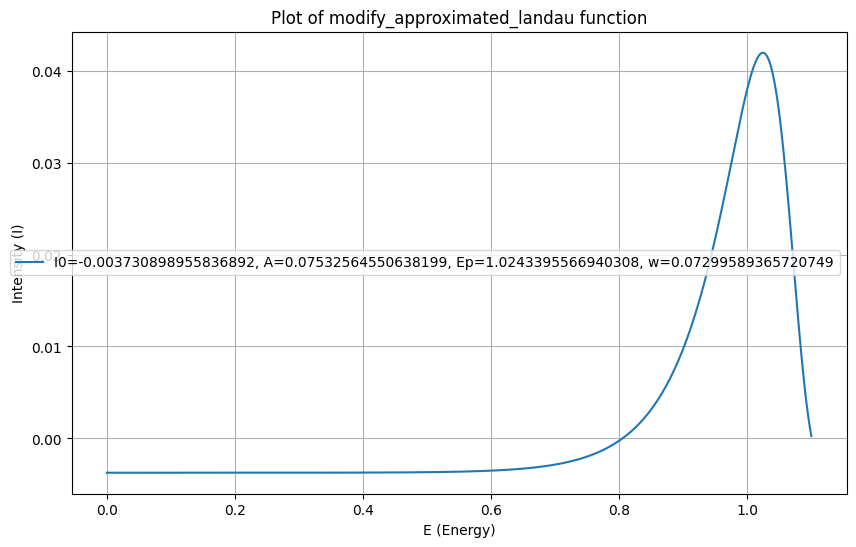

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def modify_approximated_landau(E, I0, A, Ep, w): 
    z = 2 * (Ep - E) / w 
    I = I0 + A * np.exp(-0.5 * np.exp(-z) - 0.5 * z) 
    return I

# Given parameters
I0 = -0.003730898955836892
A = 0.07532564550638199
Ep = 1.0243395566940308
w = 0.07299589365720749

# Generate x values from 0.0001 to 1.1
E_values = np.linspace(0.0001, 1.1, 500)

# Calculate the function values
y_values = modify_approximated_landau(E_values, I0, A, Ep, w)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(E_values, y_values, label=f'I0={I0}, A={A}, Ep={Ep}, w={w}')
plt.xlabel('E (Energy)')
plt.ylabel('Intensity (I)')
plt.title('Plot of modify_approximated_landau function')
plt.legend()
plt.grid(True)
plt.show()
